In [1]:
#1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


In [3]:
#2. Load Dataset
data = pd.read_csv("weatherHistory.csv")

# Suppose we predict 'Temperature'
temperature = data['Temperature (C)'].values.reshape(-1,1)

In [4]:
#Normalize the data(RNN work better with scaled data)
scaler = MinMaxScaler()
temperature_scaled = scaler.fit_transform(temperature)


In [6]:
#4. Create Sequences for RNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LEN = 10  # use past 10 days
X, y = create_sequences(temperature_scaled, SEQ_LEN)

print(X.shape, y.shape)  # (samples, seq_len, 1)


(96443, 10, 1) (96443, 1)


In [7]:
#Traim-Test Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [8]:
#Build RNN Model
model = Sequential([
    SimpleRNN(64, activation='tanh', input_shape=(SEQ_LEN, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
#Train Model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20, batch_size=32)


Epoch 1/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.0022 - val_loss: 9.6671e-04
Epoch 2/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 6.3808e-04 - val_loss: 4.0530e-04
Epoch 3/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 6.1954e-04 - val_loss: 3.8529e-04
Epoch 4/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 6.0666e-04 - val_loss: 3.6488e-04
Epoch 5/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 5.8952e-04 - val_loss: 3.6214e-04
Epoch 6/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 6.0920e-04 - val_loss: 3.6771e-04
Epoch 7/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 5.9636e-04 - val_loss: 3.9176e-04
Epoch 8/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 6.0671e-04 - val_loss: 3.7261e-04
Epoch 9/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 5.8865e-04 - val_loss: 3.9439e-04
Epoch 10/20
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 6.0232e-04 - val_loss: 3.9049e-04
Epoch 11/20
2412/2412 ━━━━━━━━━━━

In [10]:
#Make Prediction
y_pred = model.predict(X_test)

# Inverse scaling
y_test_rescaled = scaler.inverse_transform(y_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)


603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


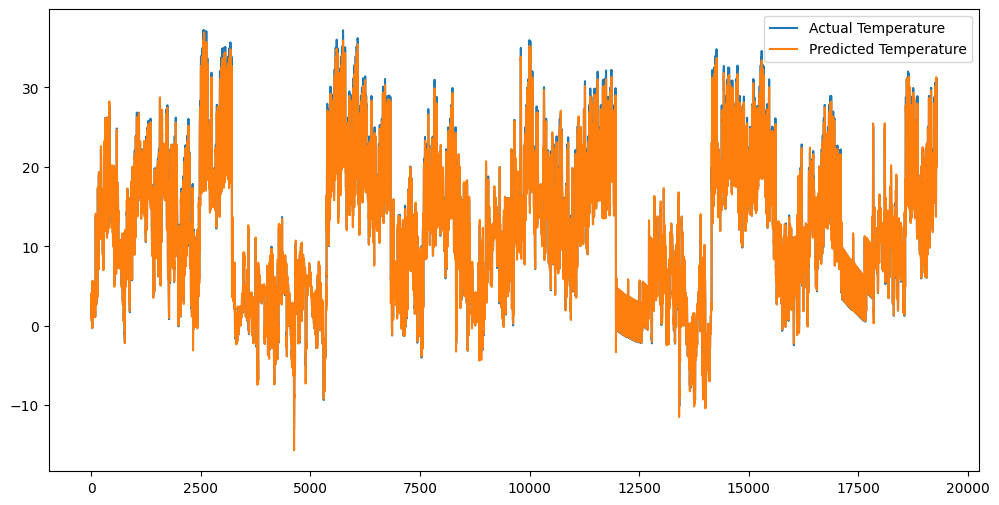

In [11]:
#Plot result
plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled, label="Actual Temperature")
plt.plot(y_pred_rescaled, label="Predicted Temperature")
plt.legend()
plt.show()


In [12]:
y_pred = model.predict(X_test)

# Inverse transform to original temperature scale
y_test_rescaled = scaler.inverse_transform(y_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)


603/603 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [13]:
# Choose a starting index in test set
start = 20   # you can change this

# Past 10 days (actual only)
past_10_actual = y_test_rescaled[start-10:start]

# Next 10 days (actual and predicted)
next_10_actual = y_test_rescaled[start:start+10]
next_10_pred = y_pred_rescaled[start:start+10]

# Put into DataFrame for better view
comparison = pd.DataFrame({
    "Past_10_Actual": past_10_actual.flatten().tolist() + [""]*10,
    "Next_10_Actual": [""]*10 + next_10_actual.flatten().tolist(),
    "Next_10_Predicted": [""]*10 + next_10_pred.flatten().tolist()
})

import pandas as pd
comparison


,Past_10_Actual,Next_10_Actual,Next_10_Predicted
0,2.755556,,
1,2.777778,,
2,2.194444,,
3,2.194444,,
4,1.827778,,
5,1.083333,,
6,1.061111,,
7,0.722222,,
8,0.883333,,
9,0.883333,,
